In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
archivo = 'csv_creados/Data_Argentina_Relative_Terms.csv'
df = pd.read_csv(archivo)
df.head(2)

,year,GDP_Current,GDP_Constant,Broad_Money,Inflation,Velocity_Money
0,1961-12-31,0.268410,0.054278,-0.003597,0.203107,0.272007
1,1962-12-31,0.277738,-0.008520,0.101083,0.288718,0.176655


In [3]:
df.columns

Index(['year', 'GDP_Current', 'GDP_Constant', 'Broad_Money', 'Inflation',
       'Velocity_Money'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            63 non-null     datetime64[ns]
 1   GDP_Current     63 non-null     float64       
 2   GDP_Constant    63 non-null     float64       
 3   Broad_Money     63 non-null     float64       
 4   Inflation       63 non-null     float64       
 5   Velocity_Money  63 non-null     float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 3.1 KB


In [5]:
df['year'] = pd.to_datetime(df['year'])

In [7]:
df.isnull().sum()

year              0
GDP_Current       0
GDP_Constant      0
Broad_Money       0
Inflation         0
Velocity_Money    0
dtype: int64

In [8]:
df.describe()

,year,GDP_Current,GDP_Constant,Broad_Money,Inflation,Velocity_Money
count,63,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1992-12-30 14:51:25.714285696,1.591292,0.023335,1.374111,1.604749,0.217181
min,1961-12-31 00:00:00,-0.054563,-0.108945,-0.194362,-0.035611,-0.668046
25%,1977-07-01 12:00:00,0.201713,-0.020096,0.211689,0.151588,-0.140163
50%,1992-12-31 00:00:00,0.331365,0.028118,0.349018,0.288718,-0.033770
75%,2008-07-01 00:00:00,0.966935,0.065438,1.115077,1.005334,0.073334
max,2023-12-31 00:00:00,28.209270,0.107180,22.351819,30.460912,9.113007
std,NaN,4.390996,0.054967,3.230300,4.660917,1.389316


Mostramos la distribucion de nuestra varaible objetivo

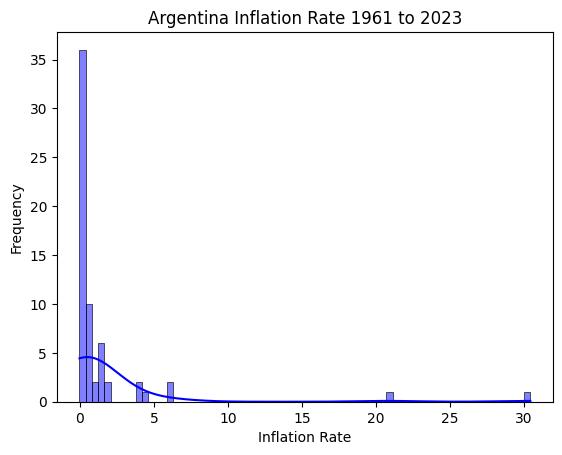

In [9]:
sns.histplot(df['Inflation'], kde=True, color='blue')
plt.title('Argentina Inflation Rate 1961 to 2023')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')
plt.show()

In [11]:
IQR_Inflation_Rate = df['Inflation'].quantile(0.75) - df['Inflation'].quantile(0.25)
IQR_Inflation_Rate

0.853746082987118

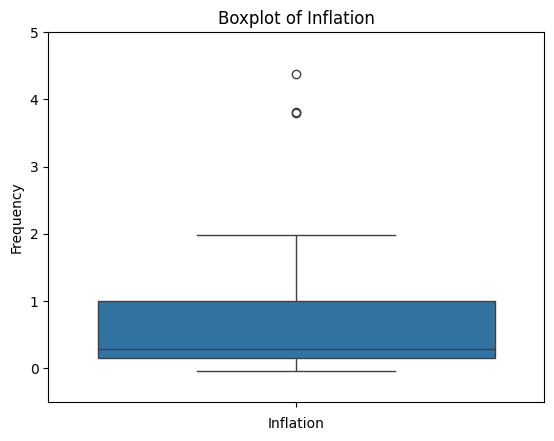

In [12]:
sns.boxplot(df['Inflation'])
plt.title('Boxplot of Inflation')
plt.xlabel('Inflation')
plt.ylabel('Frequency')
plt.ylim(-0.5, 5)
plt.show()

Manejamos los outliers de momento

In [13]:
df1 = df.copy()

upper_bond = 3*IQR_Inflation_Rate + df1['Inflation'].quantile(0.75)
lower_bond = df1['Inflation'].quantile(0.25) - 3*IQR_Inflation_Rate

df2 = df1[(df1['Inflation'] <= upper_bond) & (df1['Inflation'] >= lower_bond)]

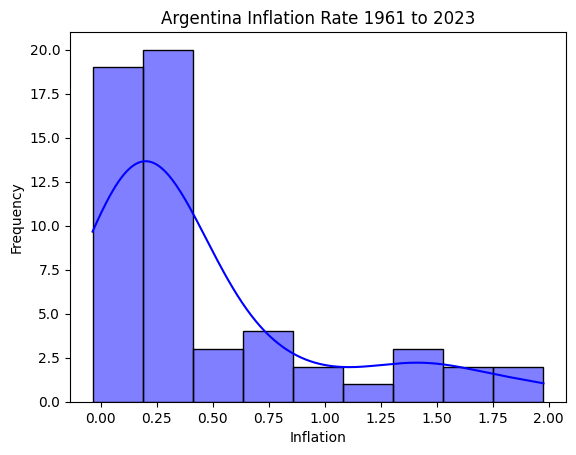

In [14]:
sns.histplot(df2['Inflation'], kde=True, color='blue')
plt.title('Argentina Inflation Rate 1961 to 2023')
plt.xlabel('Inflation')
plt.ylabel('Frequency')
plt.show()

Replicamos para Broad Money

In [15]:
IQR_Inflation_Rate = df1['Broad_Money'].quantile(0.75) - df1['Broad_Money'].quantile(0.25)

upper_bond = 3*IQR_Inflation_Rate + df1['Broad_Money'].quantile(0.75)
lower_bond = df1['Broad_Money'].quantile(0.25) - 3*IQR_Inflation_Rate

df3 = df2[(df2['Broad_Money'] <= upper_bond) & (df2['Broad_Money'] >= lower_bond)]


In [16]:
df3.to_csv('csv_creados/df_arc_normalized.csv',index=False)

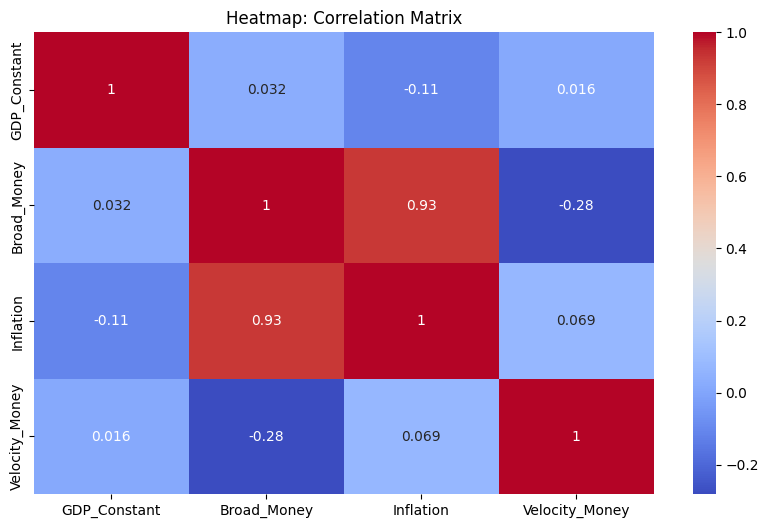

In [17]:
n_columns = ['GDP_Constant', 'Broad_Money', 'Inflation',
       'Velocity_Money']
correlation_matrix = df3[n_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')
plt.show()

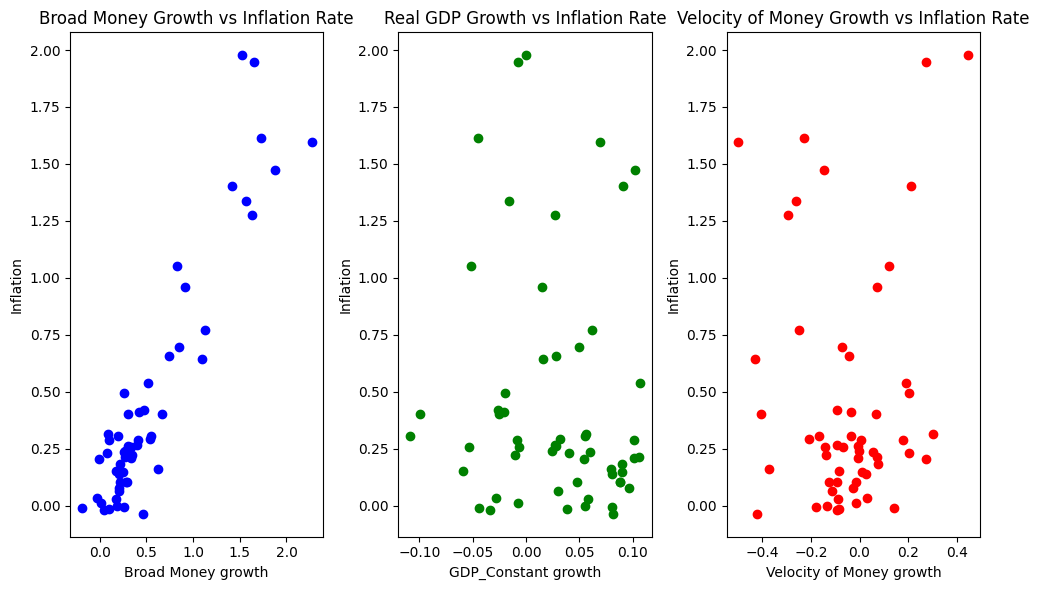

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(10, 6))

# Primer gráfico: M2 growth vs Inflation Rate
axs[0].scatter(df3['Broad_Money'], df3['Inflation'], color='blue')
axs[0].set_xlabel('Broad Money growth')
axs[0].set_ylabel('Inflation')
axs[0].set_title('Broad Money Growth vs Inflation Rate')

# Segundo gráfico: GDP real vs Inflation Rate
axs[1].scatter(df3['GDP_Constant'], df3['Inflation'], color='green')
axs[1].set_xlabel('GDP_Constant growth')
axs[1].set_ylabel('Inflation')
axs[1].set_title('Real GDP Growth vs Inflation Rate')

# Tercer gráfico: Velocity of M2 vs Inflation Rate
axs[2].scatter(df3['Velocity_Money'], df3['Inflation'], color='red')
axs[2].set_xlabel('Velocity of Money growth')
axs[2].set_ylabel('Inflation')
axs[2].set_title('Velocity of Money Growth vs Inflation Rate')


plt.tight_layout()
plt.show()


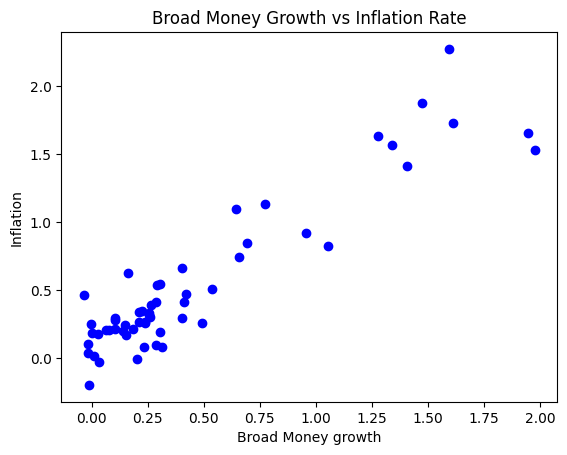

In [19]:
plt.scatter(df3['Inflation'], df3['Broad_Money'], color = 'blue')
plt.xlabel('Broad Money growth')
plt.ylabel('Inflation')
plt.title('Broad Money Growth vs Inflation Rate')
plt.show()

In [64]:
x = df3['Broad_Money']
y = df3['Inflation']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [66]:
print("Lenght of Train", len(X_train))
print("Lenght of Test", len(X_test))

Lenght of Train 44
Lenght of Test 12


In [67]:
X_train_sm = sm.add_constant(X_train)
y_train = y_train.astype(float)
X_train_sm = X_train_sm.astype(float)

model = sm.OLS(y_train, X_train_sm).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     266.6
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           8.51e-20
Time:                        20:00:59   Log-Likelihood:                 6.7451
No. Observations:                  44   AIC:                            -9.490
Df Residuals:                      42   BIC:                            -5.922
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0280      0.045     -0.624      

In [68]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

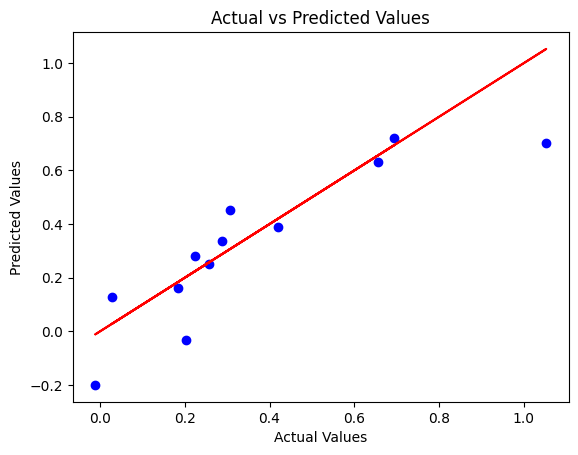

In [69]:
plt.scatter(y_test, y_pred, color = 'blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot(y_test, y_test, 'red')
plt.show()

In [70]:
mean_residuals = np.mean(model.resid)
np.round(mean_residuals,2)

-0.0

In [71]:
#for column in X_train.columns:
 #   correlation = np.corrcoef(X_train[column], model.resid)[0,1]
  #  print(f'Correlaton between {column} and residuals: {np.round(correlation,2)}')

# Convertir la Serie a DataFrame
X_train_df = X_train.to_frame(name='Broad Money')

# Supongamos que 'model' es tu modelo ajustado y tiene un atributo 'resid' para los residuos
residuals = model.resid

# Verificar que la longitud de los residuos coincida con la longitud de X_train
assert len(residuals) == len(X_train_df), "Length of residuals and X_train do not match"

# Calcular la correlación entre la columna única y los residuos
correlation = np.corrcoef(X_train_df['Broad Money'], residuals)[0, 1]
print(f'Correlation between Broad Money and residuals: {np.round(correlation, 2)}')

Correlation between Broad Money and residuals: 0.0


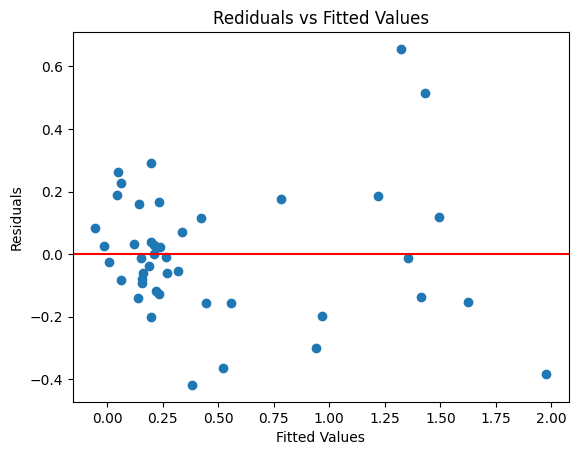

In [72]:
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Rediduals vs Fitted Values')
plt.show()

Los residuos se dsitribuyen aleatoriamente

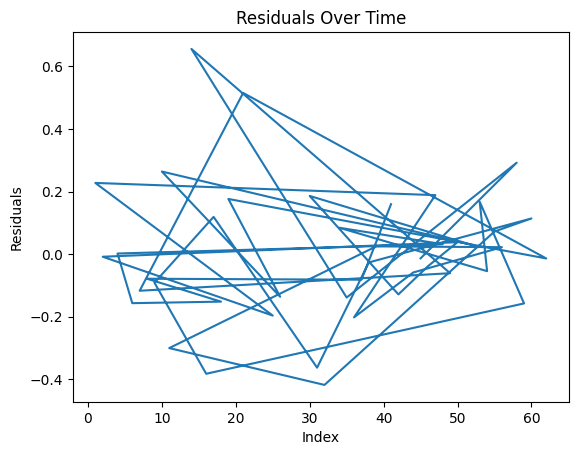

In [73]:
plt.plot(model.resid)
plt.title('Residuals Over Time')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()


No hay patrones evidentes en los residuos

In [74]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Realizar la prueba de Breusch-Pagan para medir homoscedasticidad

bp_test = het_breuschpagan(model.resid, model.model.exog)
bp_test_stat, bp_test_p_value = bp_test[1], bp_test[0]

print(f'Breusch-Pagan test p-value: {bp_test_p_value}')

Breusch-Pagan test p-value: 8.769874994227894


No hay heteroscedasticidad significativa en el modelo.

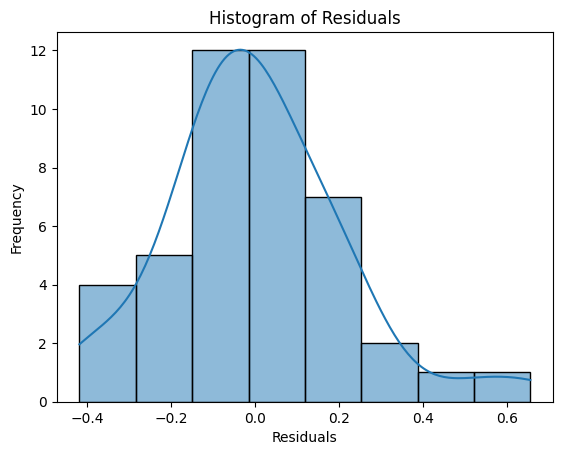

In [75]:
sns.histplot(model.resid, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Prueba de normalidad de los residuos

In [76]:
from scipy import stats

# Prueba de Shapiro-Wilk
stat, p_value = stats.shapiro(model.resid)

# Imprimir los resultados
print(f'Statistic: {stat}')
print(f'p-value: {p_value}')

# Interpretación
alpha = 0.05
if p_value > alpha:
    print('Los datos parecen seguir una distribución normal (no se rechaza H0).')
else:
    print('Los datos no siguen una distribución normal (se rechaza H0).')

Statistic: 0.9567133784294128
p-value: 0.0980345830321312
Los datos parecen seguir una distribución normal (no se rechaza H0).


### Analisis incluyendo outliers

In [78]:
X_0 = df['Broad_Money']
Y = df['Inflation']

X = sm.add_constant(X_0)

model_robust = sm.RLM(Y, X).fit()


y_pred_r = model_robust.fittedvalues


y_mean = np.mean(Y)
SST = np.sum((Y - y_mean) ** 2)
SSR = np.sum((Y - y_pred_r) ** 2)
R_squared = 1 - (SSR / SST)
print(f'R² (Coeficiente de Determinación): {R_squared:.4f}')

print(model_robust.summary())

R² (Coeficiente de Determinación): 0.9605
                    Robust linear Model Regression Results                    
Dep. Variable:              Inflation   No. Observations:                   63
Model:                            RLM   Df Residuals:                       61
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 25 Jul 2024                                         
Time:                        20:02:31                                         
No. Iterations:                    25                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const   

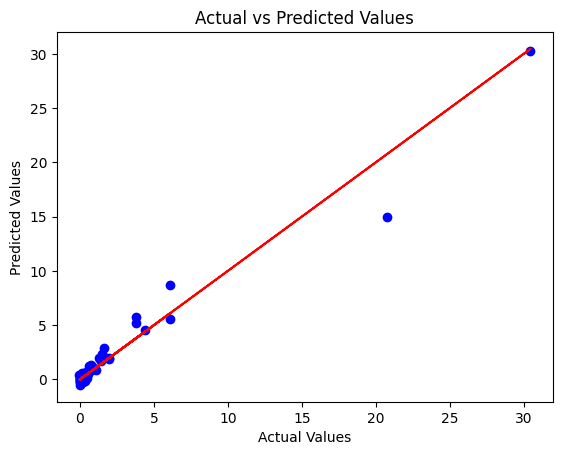

In [79]:
plt.scatter(Y, y_pred_r, color = 'blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot(Y, Y, 'red')
plt.show()

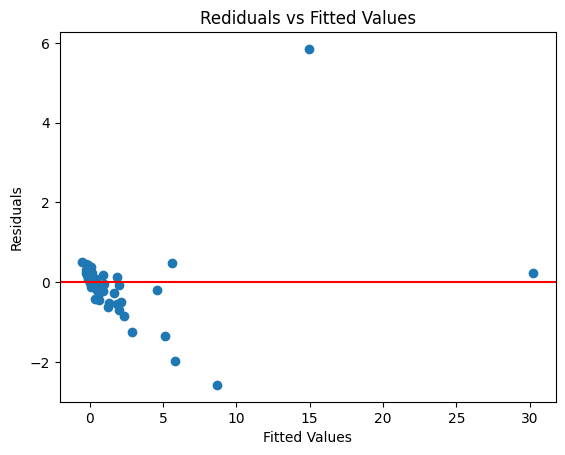

In [80]:
plt.scatter(y_pred_r, model_robust.resid)
plt.axhline(y=0, color = 'red')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Rediduals vs Fitted Values')
plt.show()

In [89]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

# Definir las métricas
def r2_score_func(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

def mse_func(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def mae_func(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

# Usar cross_val_score para diferentes métricas
r2_scorer = make_scorer(r2_score_func)
mse_scorer = make_scorer(mse_func)

r2_cv_scores = cross_val_score(model, X, Y, cv=kf, scoring=r2_scorer)
mse_cv_scores = cross_val_score(model, X, Y, cv=kf, scoring=mse_scorer)


print(f'Cross-validated R² scores: {r2_cv_scores}')
print(f'Mean Cross-validated R² score: {np.mean(r2_cv_scores):.4f}')
print(f'Standard Deviation of Cross-validated R² score: {np.std(r2_cv_scores):.4f}')

print(f'Cross-validated MSE scores: {mse_cv_scores}')
print(f'Mean Cross-validated MSE score: {np.mean(mse_cv_scores):.4f}')
print(f'Standard Deviation of Cross-validated MSE score: {np.std(mse_cv_scores):.4f}')


Cross-validated R² scores: [-0.07690403  0.77803476  0.86636205  0.89519678  0.95478626]
Mean Cross-validated R² score: 0.6835
Standard Deviation of Cross-validated R² score: 0.3844
Cross-validated MSE scores: [0.1874381  0.04051187 0.47864358 3.47042617 3.05558276]
Mean Cross-validated MSE score: 1.4465
Standard Deviation of Cross-validated MSE score: 1.4956
